In [ ]:
import pandas as pd
datos = pd.read_csv('housing.csv')
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

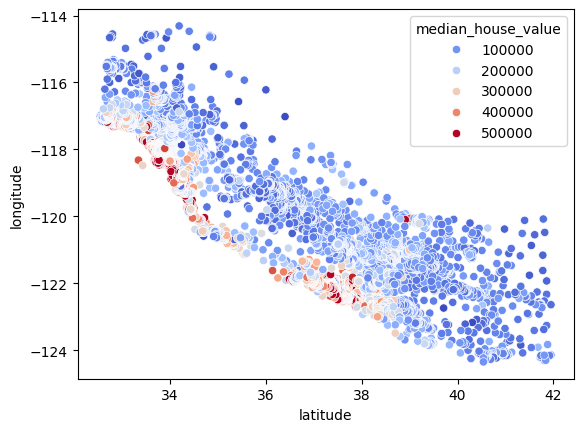

In [ ]:
import seaborn as sb
sb.scatterplot(x='latitude', y='longitude',
               data=datos, hue='median_house_value', palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

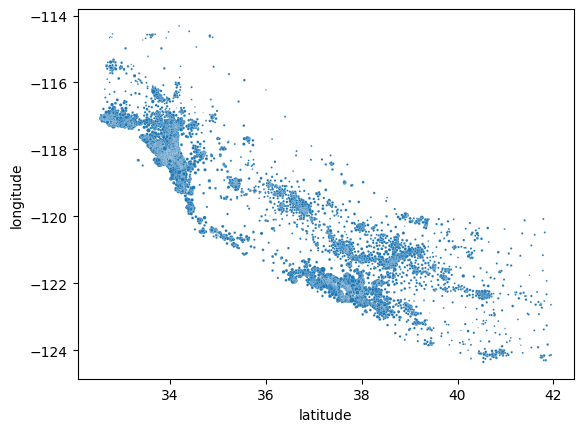

In [ ]:
sb.scatterplot(x='latitude', y='longitude', data=datos,  s=datos['median_income'])

In [ ]:
datos.loc[:, ['latitude', 'longitude', 'median_income']]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [ ]:
from sklearn.cluster import KMeans

X = datos.loc[:, ['latitude', 'longitude', 'median_income']]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

In [ ]:
predicciones.shape

(20640,)

In [ ]:
X['segmento_economico'] = predicciones

In [ ]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,5
...,...,...,...,...
20635,39.48,-121.09,1.5603,5
20636,39.49,-121.21,2.5568,5
20637,39.43,-121.22,1.7000,5
20638,39.43,-121.32,1.8672,5


In [ ]:
X['segmento_economico'].value_counts()

,count
segmento_economico,
0,6564
5,4883
3,4201
1,2764
4,1677
2,551


<Axes: xlabel='latitude', ylabel='longitude'>

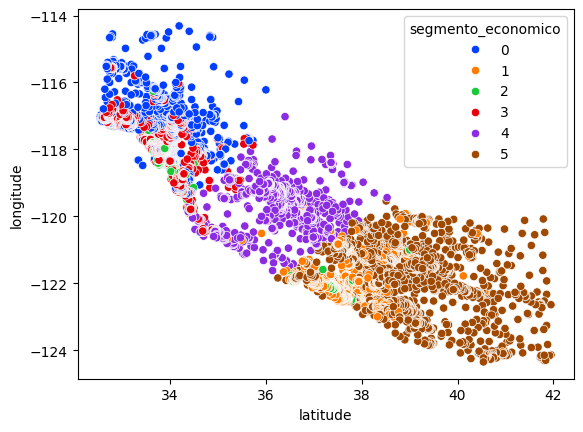

In [ ]:
sb.scatterplot(x='latitude', y='longitude', data=X, hue='segmento_economico', palette='bright')

<ipython-input-34-913183756de2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='segmento_economico', data=X, palette='bright')


<Axes: xlabel='segmento_economico', ylabel='count'>

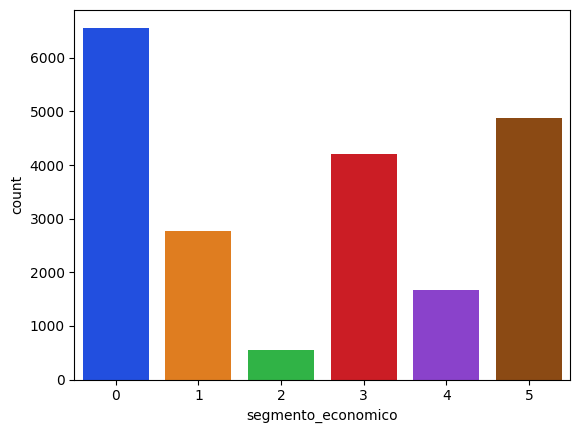

In [ ]:
sb.countplot(x='segmento_economico', data=X, palette='bright')

In [ ]:
X.groupby(['segmento_economico'])['median_income'].mean()

,median_income
segmento_economico,
0,2.788679
1,5.524420
2,10.488034
3,5.304274
4,2.660862
5,2.824459


In [ ]:
# X
# X.median_income.min()
X.head()

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,5


<Axes: xlabel='longitude', ylabel='latitude'>

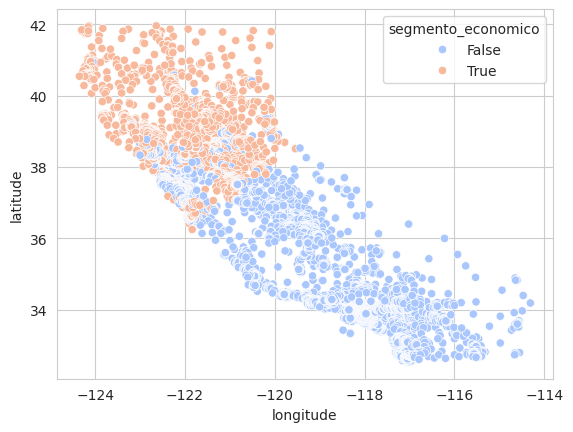

In [ ]:
sb.set_style('whitegrid')
sb.scatterplot(x=X.longitude, y=X.latitude, hue=X.segmento_economico >= 5, data=X, palette='coolwarm')
# sb.scatterplot(x=X.longitude, y=X.latitude, hue=X.median_income, data=X, palette='coolwarm')
